In [17]:
import torch
import torch.nn as nn

max_sequence_length = 10
d_model = 6

In [18]:
even_i = torch.arange(0, d_model, 2).float()
even_i

tensor([0., 2., 4.])

In [19]:
even_denominator = torch.pow(10000, even_i / d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [20]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [21]:
odd_denominator = torch.pow(10000, (odd_i - 1) / d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [22]:
even_denominator == odd_denominator

tensor([True, True, True])

In [23]:
position = torch.arange(max_sequence_length, dtype = torch.float)

In [24]:
position

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [25]:
position = position.reshape(max_sequence_length, 1)

In [26]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [27]:
even_pe = torch.sin(position / even_denominator)
odd_pe = torch.cos(position / odd_denominator)

In [30]:
even_pe.shape, odd_pe.shape

(torch.Size([10, 3]), torch.Size([10, 3]))

In [28]:
stacked = torch.stack([even_pe, odd_pe], dim = 2)
stacked.shape

torch.Size([10, 3, 2])

In [32]:
PE = torch.flatten(stacked, start_dim = 1, end_dim = 2)
PE, PE.shape

(tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
         [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
         [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
         [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
         [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
         [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
         [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
         [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
         [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]]),
 torch.Size([10, 6]))

In [33]:
class PositionlEncoding(nn.Module):
  def __init__(self, d_model, max_sequence_length):
    super().__init__()
    self.max_sequence_length = max_sequence_length
    self.d_model = d_model

  def forward(self):
    even_i = torch.arange(0, self.d_model, 2).float()
    denominator = torch.pow(10000, even_i / self.d_model)
    position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
    even_pe = torch.sin(position / denominator)
    odd_pe = torch.cos(position / denominator)
    stacked = torch.stack([even_pe, odd_pe], dim = 2)
    PE = torch.flatten(stacked, start_dim = 1, end_dim = 2)
    return PE

In [34]:
pe = PositionlEncoding(d_model = 6, max_sequence_length = 10)


In [36]:
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [ ]:
import matplotlib.pyplot as plt
plt.

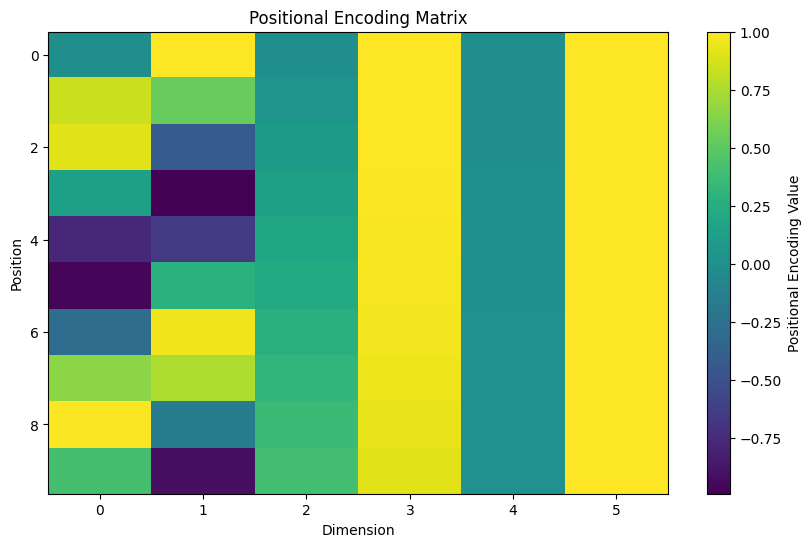

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(PE, cmap='viridis', aspect='auto')
plt.colorbar(label='Positional Encoding Value')
plt.title('Positional Encoding Matrix')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.show()